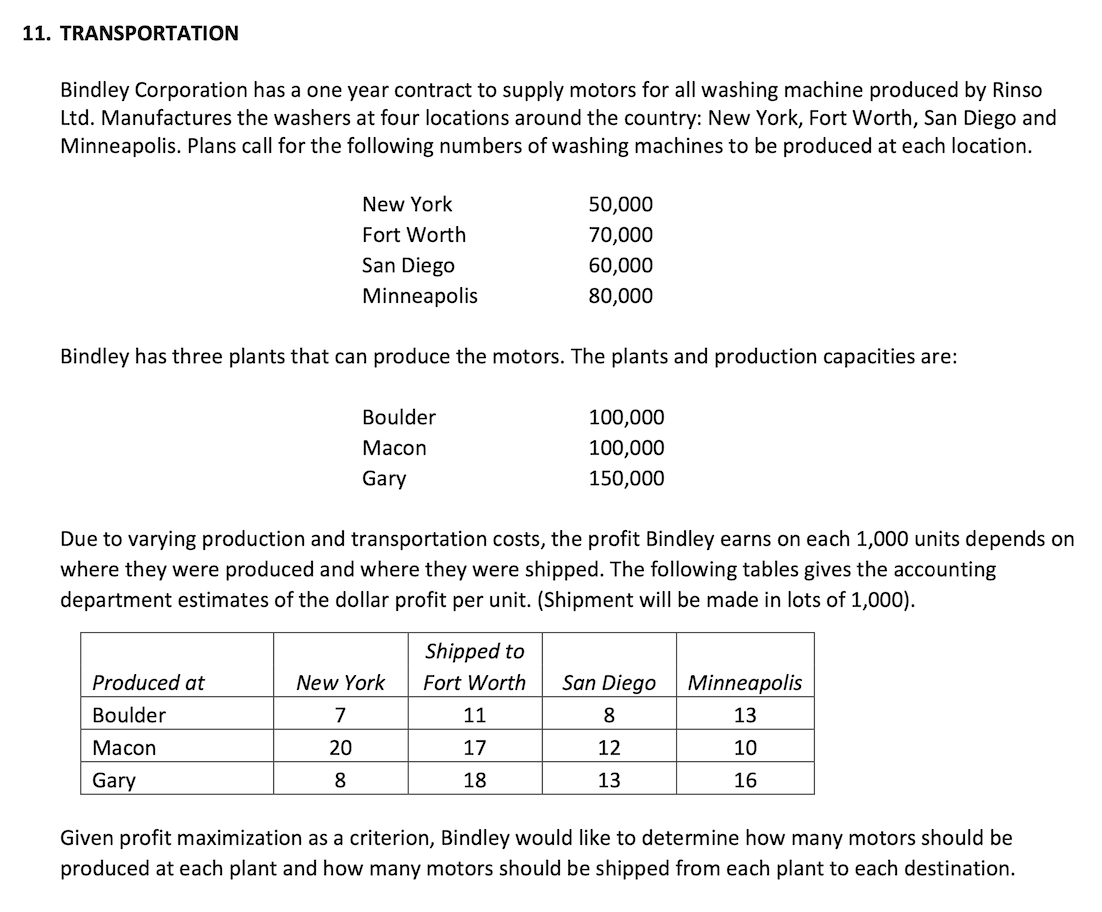

In [2]:
from pulp import *
import pandas as pd

In [3]:
profitdf = pd.DataFrame({'Plants': ['New York', 'Fort Worth', 'San Diego', 'Minneapolis'],
                   'Boulder': [7, 11, 8, 13],
                   'Macon': [20, 17, 12, 10],
                   'Gary': [8, 18, 13, 16],
                    })
# profitdf['Requirements'] = [50000, 70000, 60000, 80000]

print(profitdf)

        Plants  Boulder  Macon  Gary
0     New York        7     20     8
1   Fort Worth       11     17    18
2    San Diego        8     12    13
3  Minneapolis       13     10    16


In [6]:
# Creates a list of all the supply nodes
plants = ["Boulder", "Macon", "Gary"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"Boulder": 100000, "Macon": 100000, "Gary": 150000}

# Creates a list of all demand nodes
cities = ["New York", "Fort Worth", "San Diego", "Minneapolis"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "New York": 50000,
    "Fort Worth": 70000,
    "San Diego": 60000,
    "Minneapolis": 80000
}

# Creates a list of costs of each transportation path
costs = [  # Cities
    [7,11,8,13],  # Boulder   Plants
    [20,17,12,10],  # Macon
    [8,18,13,16]   # Gary
]

# The cost data is made into a dictionary
costs = makeDict([plants, cities], costs, 0)

In [7]:
# Initialize the LP
model = LpProblem('Transportation', LpMinimize)

# Decision Variables
# Creates a list of tuples containing all the possible routes for transport
routes = [(p, c) for p in plants for c in cities]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (plants, cities), 0, None, LpInteger)

# Objective Function
model += lpSum([vars[p][c] * costs[p][c] for (p, c) in routes]), "Transportion Costs"

# Add Constraints
# The maximum supply constraints
for p in plants:
    model += lpSum([vars[p][c] for c in cities]) <= supply[p], "Total washers out of plants: %s" % p

# The minimum demand constraints
for c in cities:
    model += lpSum([vars[p][c] for p in plants]) >= demand[c], "Total washers into cities: %s" % c

print(model)

# Solve the modellem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_profit = value(model.objective)
print(f"maximum profit = {max_profit}")

Transportation:
MINIMIZE
11*Route_Boulder_Fort_Worth + 13*Route_Boulder_Minneapolis + 7*Route_Boulder_New_York + 8*Route_Boulder_San_Diego + 18*Route_Gary_Fort_Worth + 16*Route_Gary_Minneapolis + 8*Route_Gary_New_York + 13*Route_Gary_San_Diego + 17*Route_Macon_Fort_Worth + 10*Route_Macon_Minneapolis + 20*Route_Macon_New_York + 12*Route_Macon_San_Diego + 0
SUBJECT TO
Total_washers_out_of_plants:_Boulder: Route_Boulder_Fort_Worth
 + Route_Boulder_Minneapolis + Route_Boulder_New_York
 + Route_Boulder_San_Diego <= 100000

Total_washers_out_of_plants:_Macon: Route_Macon_Fort_Worth
 + Route_Macon_Minneapolis + Route_Macon_New_York + Route_Macon_San_Diego
 <= 100000

Total_washers_out_of_plants:_Gary: Route_Gary_Fort_Worth
 + Route_Gary_Minneapolis + Route_Gary_New_York + Route_Gary_San_Diego
 <= 150000

Total_washers_into_cities:_New_York: Route_Boulder_New_York
 + Route_Gary_New_York + Route_Macon_New_York >= 50000

Total_washers_into_cities:_Fort_Worth: Route_Boulder_Fort_Worth
 + Route_Ga

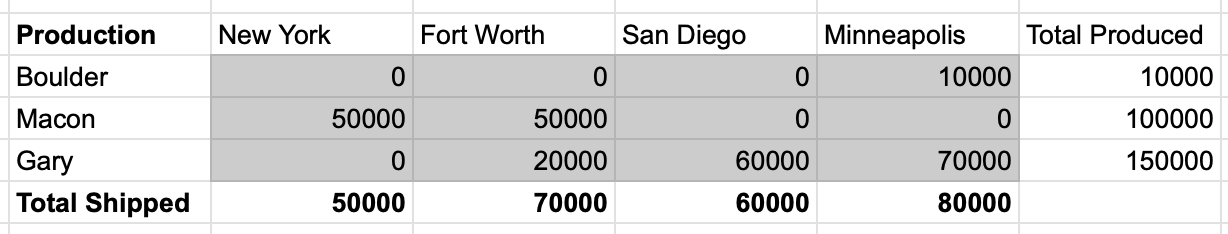